<a href="https://colab.research.google.com/github/xaviermurilo/xaviermurilo/blob/main/Lego_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today i'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/)

# Import Statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Data Exploration

How many different colours does the LEGO company produce? 

In [4]:
colors = pd.read_csv('colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [5]:
colors.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [6]:
colors.name.nunique()

135

 number of transparent colours 

In [7]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [8]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [9]:
sets = pd.read_csv('sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [10]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


The firts sets

In [11]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


 How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [12]:
sets[sets['year'] == 1949].count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

top 5 LEGO sets with the most number of parts. 

In [13]:
sets.sort_values('num_parts',ascending = False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


 number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [14]:
set_by_year = sets.groupby('year').count()
set_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [15]:
set_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

In [16]:
set_by_year.head(1)

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5


 Showing the number of LEGO releases on a line chart using Matplotlib.


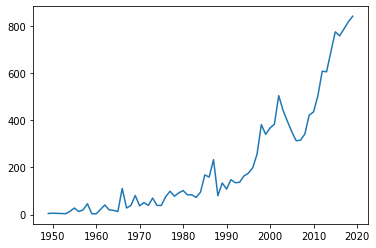

In [17]:
plt.plot(set_by_year.index[:-2], set_by_year.set_num[:-2])


number of different themes shipped by year. 


In [25]:
themes_by_year = sets.groupby('year').agg({'theme_id' : pd.Series.nunique})


In [31]:
themes_by_year.rename(columns={'theme_id' : 'nr_themes'}, inplace=True)

Plot the number of themes released by year on a line chart.

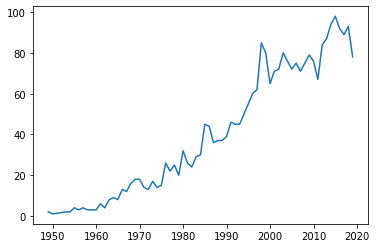

In [33]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2] )

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'number of themes')

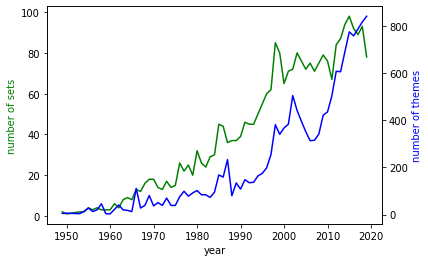

In [42]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], color='g' )
ax2.plot(set_by_year.index[:-2], set_by_year.set_num[:-2], 'b')

ax1.set_xlabel('year')
ax1.set_ylabel('number of sets', color='g')
ax2.set_ylabel('number of themes', color='b')

 How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [48]:
partes_per_set = sets.groupby('year').agg({'num_parts' : ['mean']})
partes_per_set

,num_parts
,mean
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873


In [51]:
partes_per_set.head(1)

,num_parts
,mean
year,
1949,99.6


Has the size and complexity of LEGO sets increased over time based on the number of parts? 

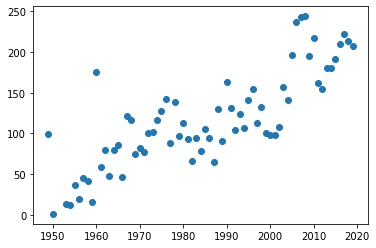

In [58]:
plt.scatter(partes_per_set.index[:-2], partes_per_set.num_parts[:-2])

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [65]:
set_theme_counts = sets['theme_id'].value_counts()
set_theme_counts

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

. How many <code>id</code>s correspond to this name in the themes.csv?

In [69]:
themes = pd.read_csv('themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [70]:
themes[themes.name=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [71]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


 Combining) DataFrames based on a Key


In [72]:
set_theme_count = pd.DataFrame({
    'id' : set_theme_counts.index,
    'set_count' : set_theme_counts.values
})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


In [74]:
merge_df = pd.merge(set_theme_count, themes, on='id')
merge_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

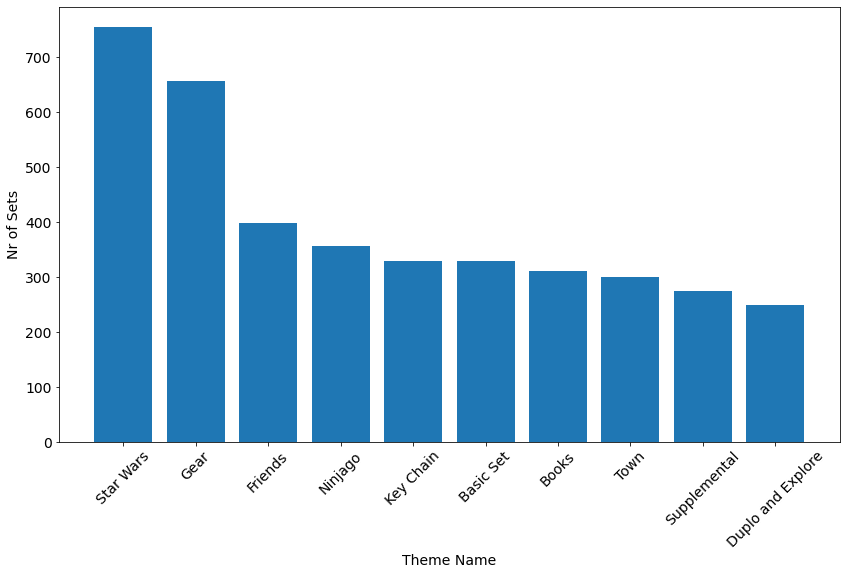

In [77]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
     
plt.bar(merge_df.name[:10], merge_df.set_count[:10])